#### Goal of our project 
Customer Segmentation: Understanding different groups of customers based on their behavior, demographics, and response to previous marketing campaigns. This helps in tailoring future marketing efforts.

Predicting Customer Response: Using historical data to predict how likely customers are to respond positively (e.g., by subscribing to a product or service) to a marketing campaign. This is often framed as a classification problem in machine learning.

In [2]:
import pandas as pd

In [3]:
bank_data = pd.read_csv("bank.csv" , sep=";", encoding='utf-8')

### 1) Data Underastanding 

In [3]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

- **Age:** The age of the client.
- **Job:** The type of job the client has.
- **Marital:** Marital status of the client.
- **Education:** The education level of the client.
- **Default:** Indicates if the client has credit in default.
- **Balance:** The yearly average balance, in euros, of the client.
- **Housing:** Indicates if the client has a housing loan.
- **Loan:** Indicates if the client has a personal loan.
- **Contact:** The type of communication used for contacting the client.
- **Day:** The last contact day of the month.
- **Month:** The last contact month of the year.
- **Duration:** Duration of the last contact, in seconds.
- **Campaign:** Number of contacts performed during this campaign for this client.
- **Pdays:** Number of days that passed by after the client was last contacted from a previous campaign.
- **Previous:** Number of contacts performed before this campaign for this client.
- **Poutcome:** Outcome of the previous marketing campaign.
- **Y:** Indicates whether the client has subscribed to a term deposit (target variable).
arget variable).

In [6]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
bank_data.shape

(4521, 17)

In [10]:
bank_data.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

- How many different job types, marital statuses, education levels, etc., are present in the data.- 
The variety of numerical values in columns like age, balance, day, duration, campaign, pdays, and previous.- 
The number of unique values in the target variable 'y', which should be 2 (usually 'yes' and 'no').

#### Missing values

In [4]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Duplicates

In [21]:
bank_data.duplicated().any()

False

In [22]:
bank_data.duplicated().sum()

0

### Single_value Columns

In [4]:
# Check for single-valued columns
single_valued_columns = [col for col in bank_data.columns if bank_data[col].nunique() == 1]

In [5]:
single_valued_columns

[]

#### Correlation

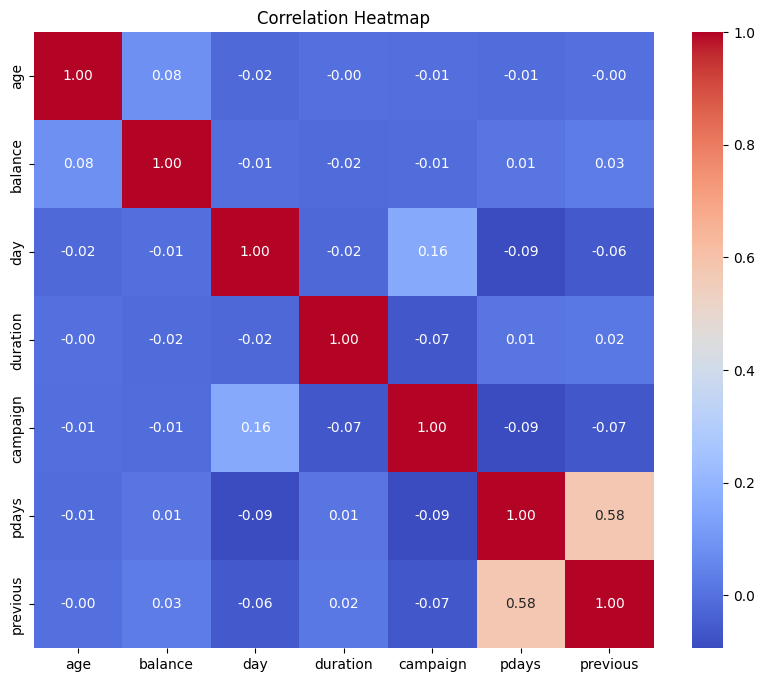

In [34]:
numeric_columns = bank_data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

#### Age and Balance: There is a very slight positive correlation between age and balance, suggesting that as clients age, they might have a tendency to accumulate more in their bank balances, but the correlation is very weak.
#### Pdays and Previous: There is a moderate positive correlation between 'pdays' and 'previous', meaning that clients who were contacted more often in previous campaigns tend to have a shorter number of days since the last contact. This suggests a pattern of regular follow-up with certain clients.

#### Outliers

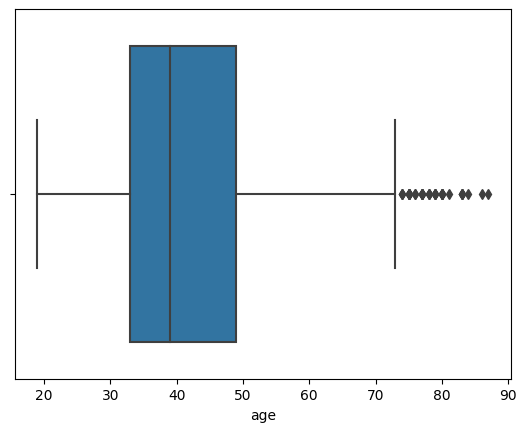

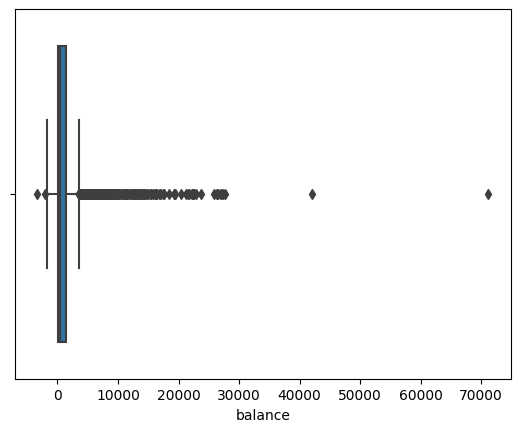

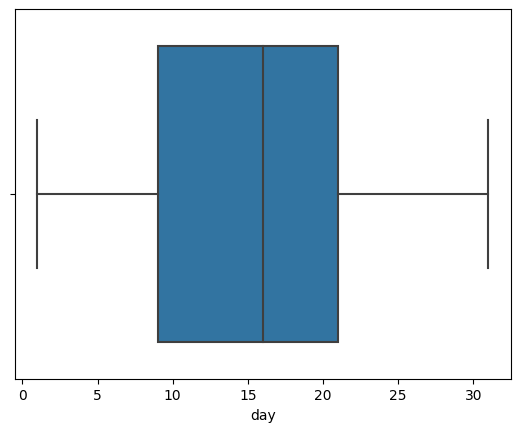

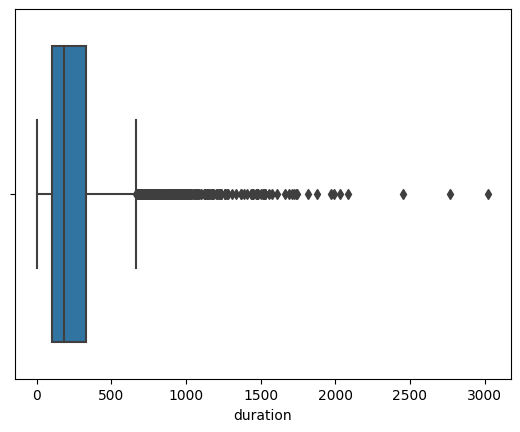

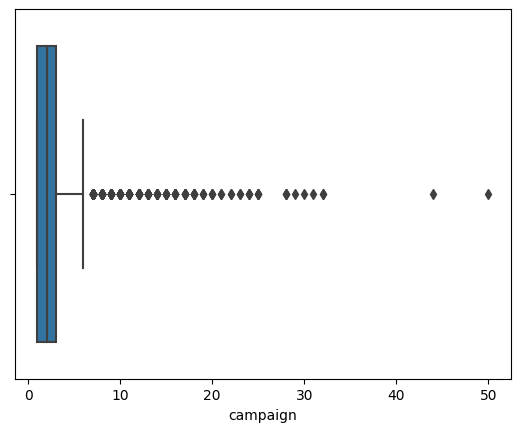

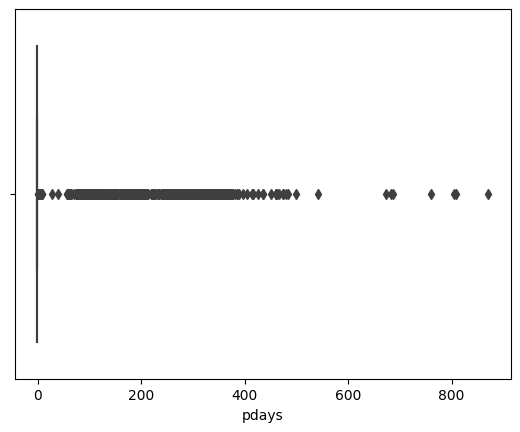

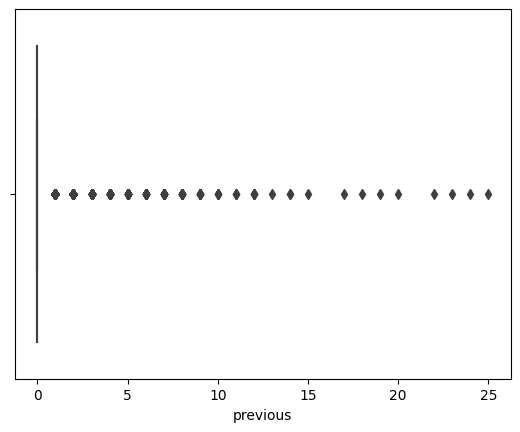

In [30]:
# Box plots for numerical columns
for column in bank_data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=column, data=bank_data)
    plt.show()


#### The columns 'Age', 'Balance', 'Duration', 'Campaign', 'Pdays', and 'Previous' all exhibit outliers, which are values that fall far outside the typical range in the dataset. 

#### Univarite Analysis 

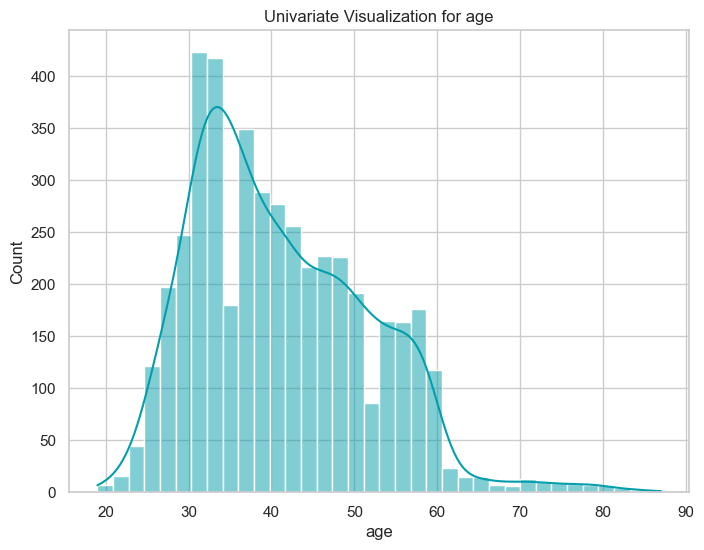

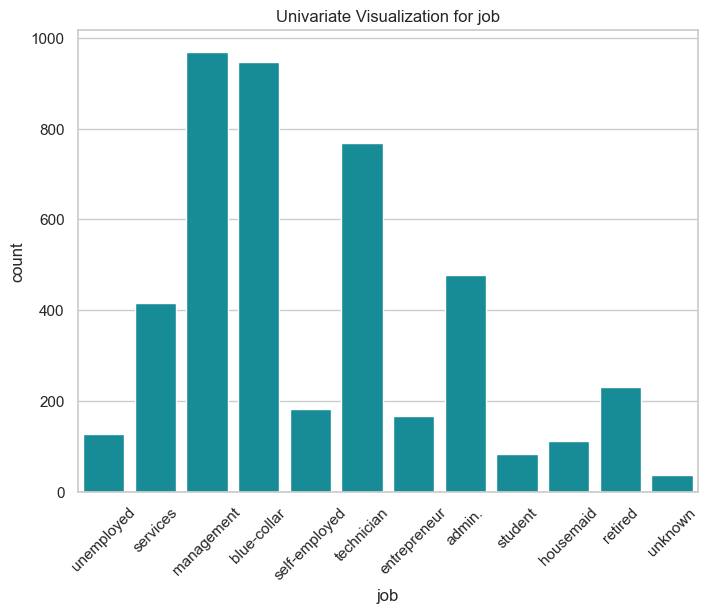

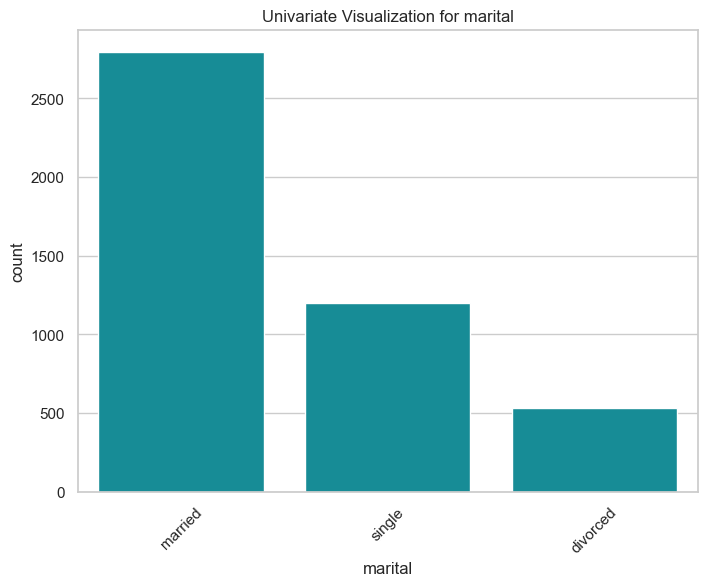

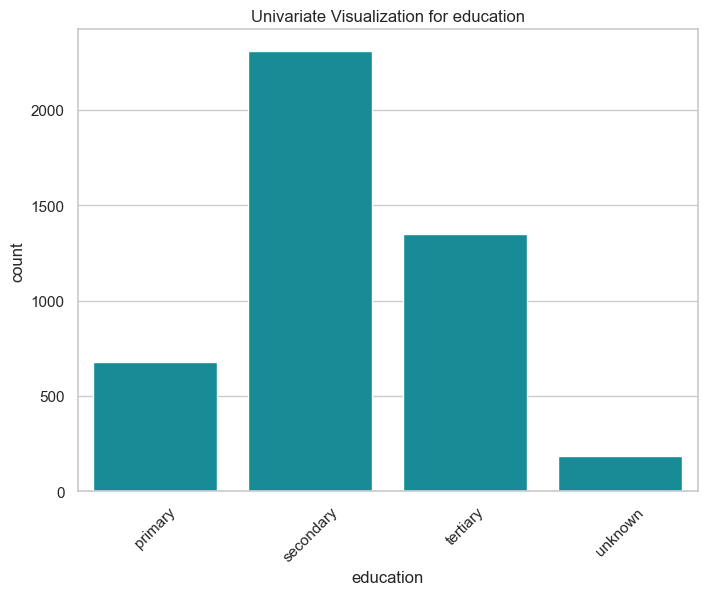

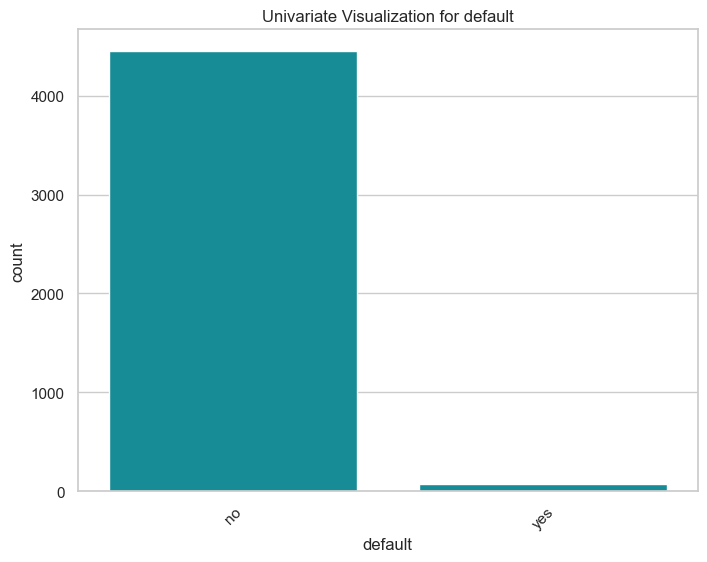

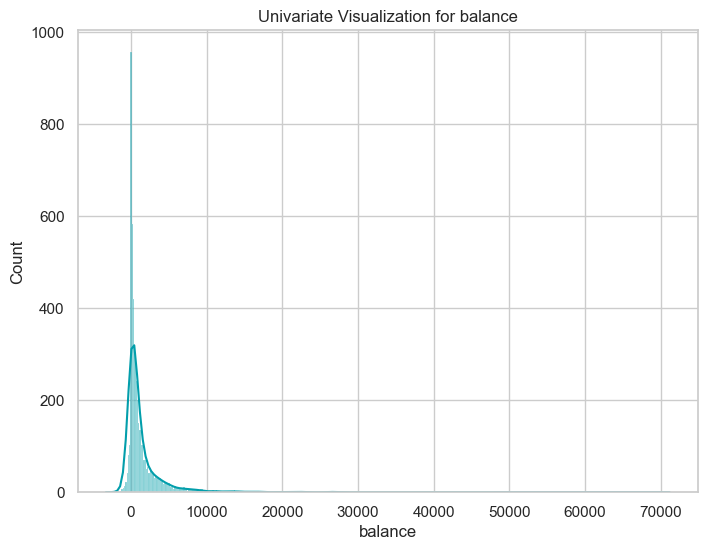

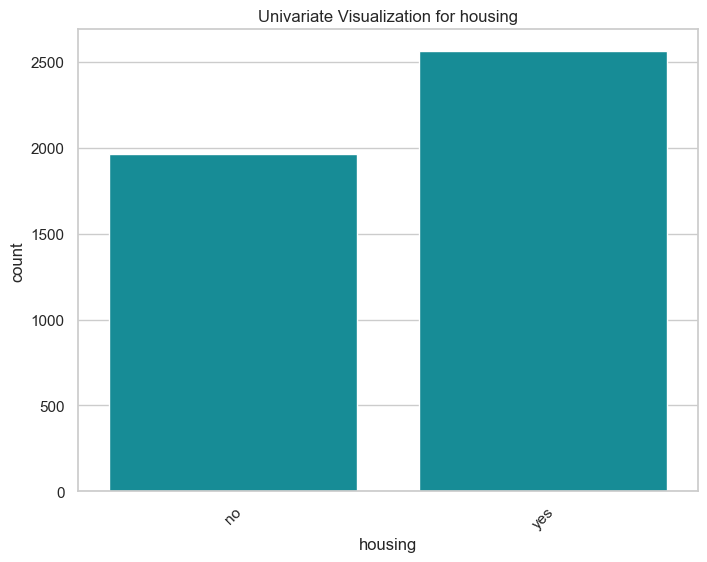

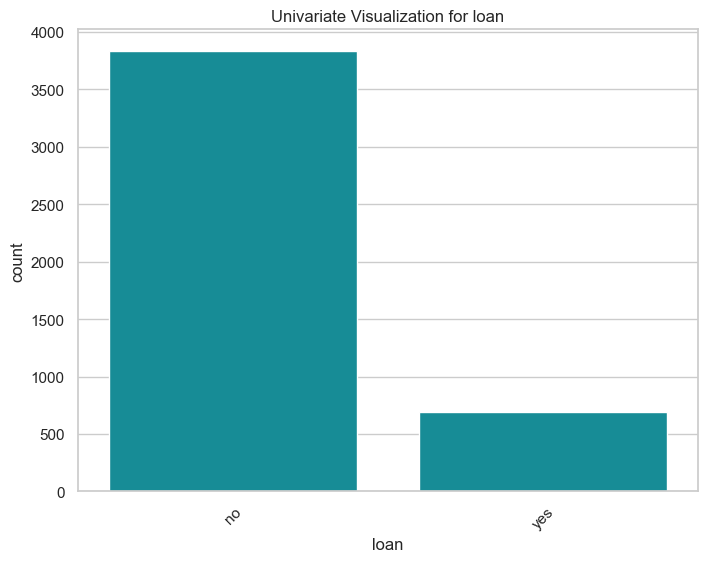

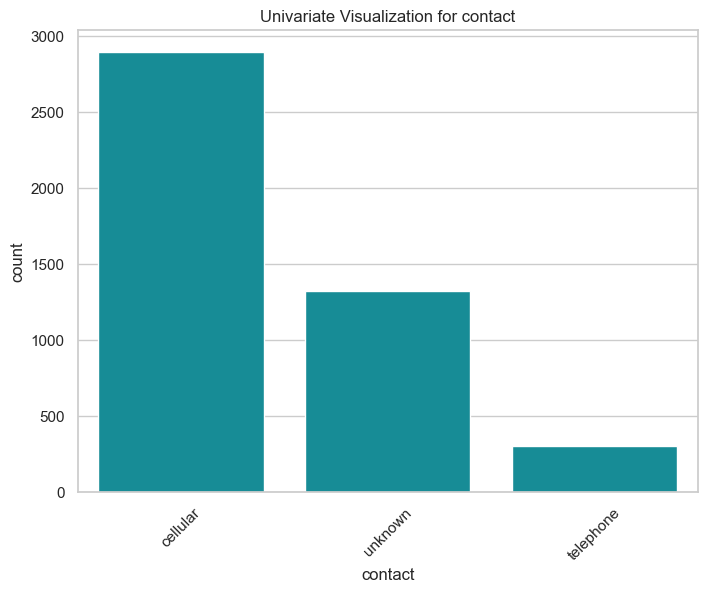

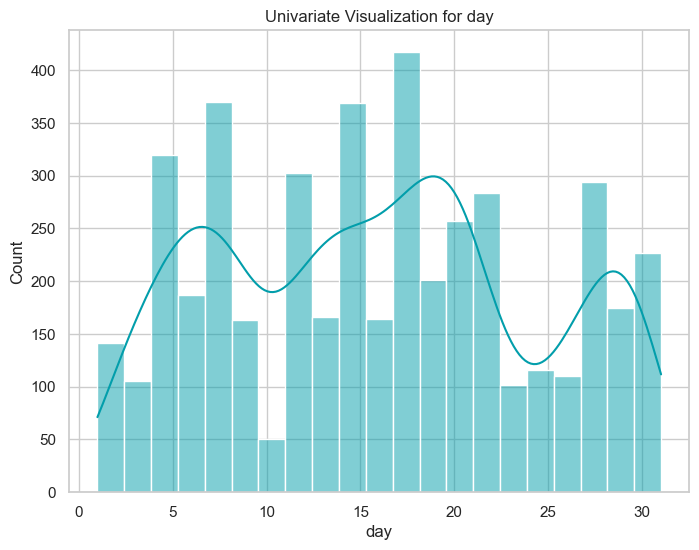

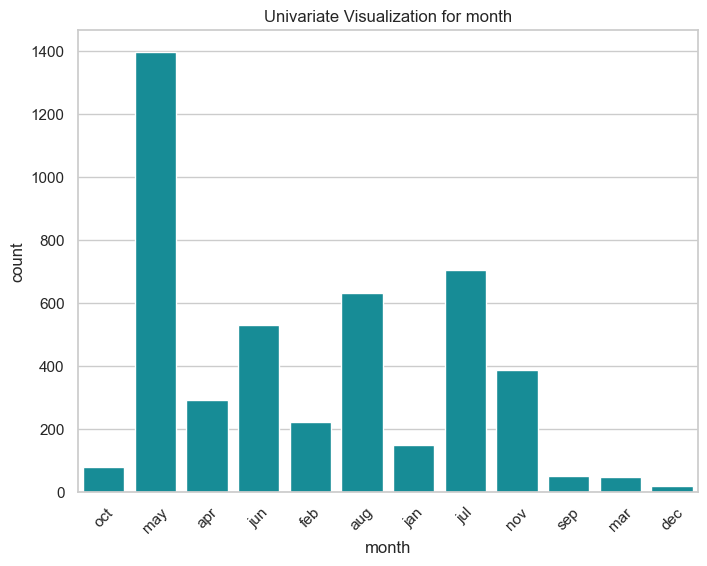

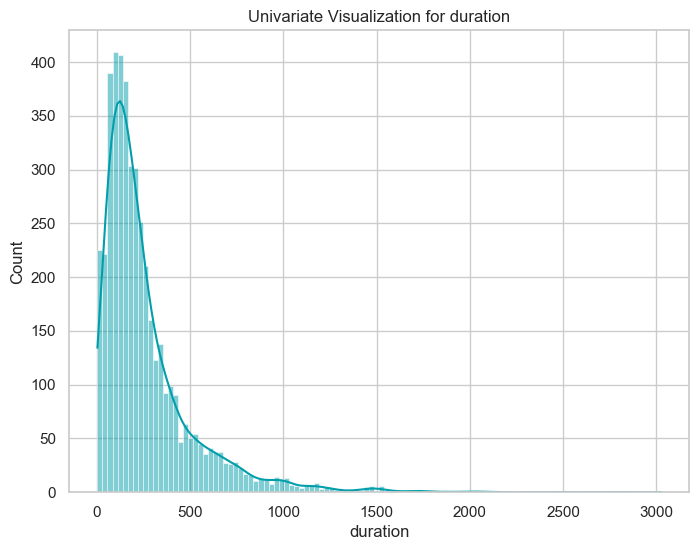

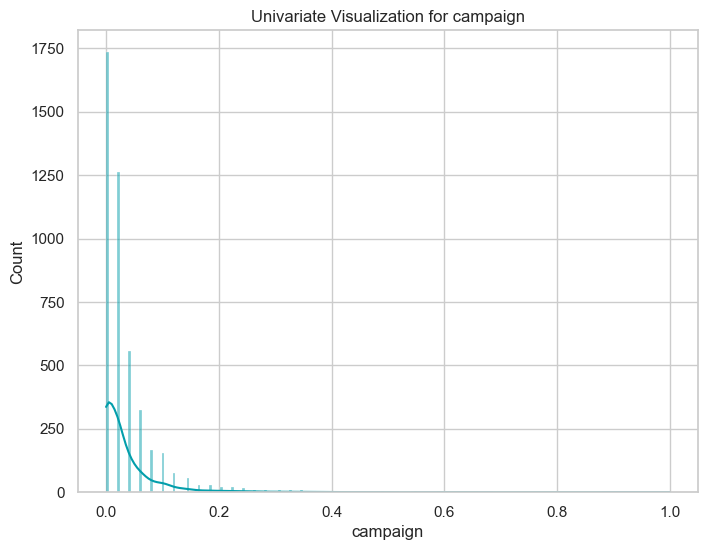

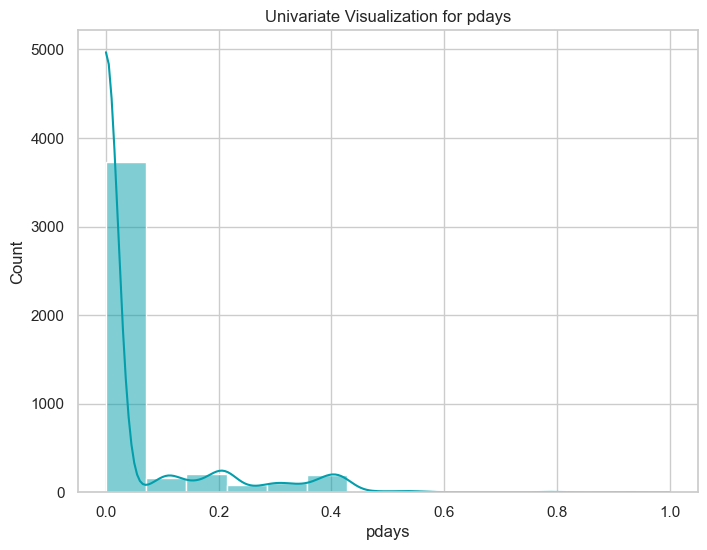

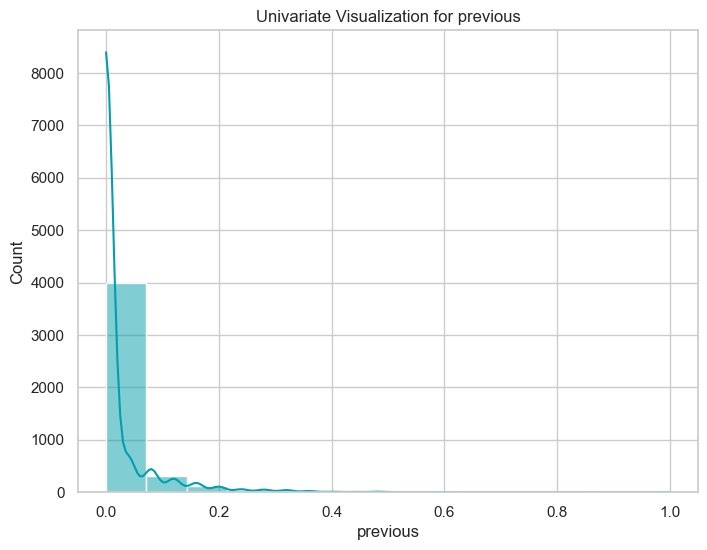

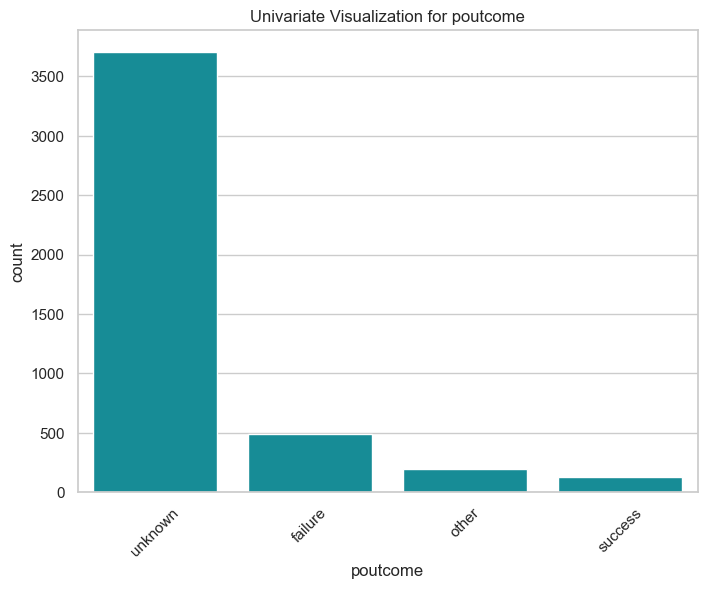

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'bank_data' is your DataFrame

# Set color for the plots
plot_color = '#029EAB'

# Define the independent variables
independent_variables = [
    'age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
    'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
    'previous', 'poutcome'
]

# Loop through independent variables and create visualizations
for column in independent_variables:
    plt.figure(figsize=(8, 6))
    
    # If the column is categorical
    if bank_data[column].dtype == "object":
        sns.countplot(data=bank_data, x=column, color=plot_color)
        plt.xticks(rotation=45)
    
    # If the column is numerical
    else:
        sns.histplot(data=bank_data, x=column, kde=True, color=plot_color)  # Histogram with kernel density estimate
    
    plt.title(f'Univariate Visualization for {column}')
    plt.show()


- **Age:** The boxplot for age shows that the median age of clients is around the mid-30s to 40s.
There's a wide range of ages among the bank's clients, but the majority fall within the 30 to 60 age range.
There are quite a few outliers on the higher end, indicating that there are clients who are significantly older than the average bank client.
- **Job:*The tallest bars represent the most common job types among the bank's clients, which appear to be "management", "blue-collar", and "technician" jobs. These categories may represent key segments for the bank.
There are fewer clients in jobs classified as "entrepreneur", "retired", "unemployed", and "student", which are represented by the shorter barss.
- **Marital:Most of the clients are married, followed by singles and then divorced. This suggests that marketing strategies could be tailored to target married individuals more, as they represent a larger segment of the bank's clientele.nt.
- **Education:A significant number of clients have secondary education, followed by those with tertiary education. Those with primary education or unknown education levels are the least. nt.
- **Default:lt.
- **Balance:The boxplot shows a wide range of balances with a number of outliers, indicating that there are some clients with significantly high balances. The bank could consider these high-balance individuals as a potential segment for premium services.nt.
- **Housing:A substantial number of clients have housing loans, which could be a key factor in determining their financial products' preferences. Fewer clients have personal loans, which might suggest a potential market for such products.an.
- **Loan:** Indicates if the client has a personal loan.
- **Contact:Cellular phones are the most common contact method, indicating the importance of mobile communication in reaching out to clients.nt.
- **Day: The day of the last contact appears to be relatively uniformly distributed across the month, suggesting that there isn't a specific time when clients are more likely to be contacted.
- **Month:** May has the highest number of contacts, followed by July, August, and June. This seasonality aspect could be crucial for planning marketing campaigns.
- 
- **Duration:Most calls are relatively short, but there are outliers with very long call durations. This could suggest that longer calls might be associated with successful sales and should be investigated further.ds.
- **Campaign:** Number of contacts performed during this campaign for this client.
- **Pdays:** Number of days that passed by after the client was last contacted from a previous campaign.
- **Previous:** Number of contacts performed before this campaign for this client.
- **Poutcome:** Outcome of the previous marketing campaign.
- **Y:** Indicates whether the client has subscribed to a term deposit (target variable).


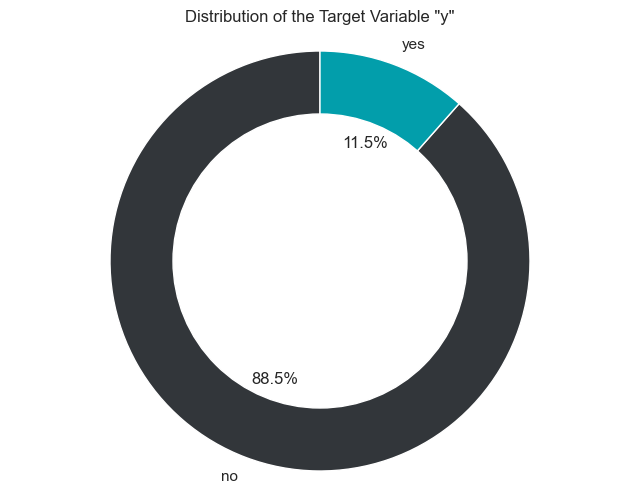

In [14]:
import matplotlib.pyplot as plt

# Assuming 'bank_data' is your DataFrame and 'y' is the column you want to plot

# Count the occurrences of 'yes' and 'no' in the 'y' column
y_counts = bank_data['y'].value_counts()

# Define the colors for each class
colors = ["#029EAB" if label == "yes" else "#32363A" for label in y_counts.index]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(y_counts, labels=y_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})

# Draw a circle at the center of pie to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Set the title of the plot
plt.title('Distribution of the Target Variable "y"')

# Show the plot
plt.show()


#### Bivariate Analysis

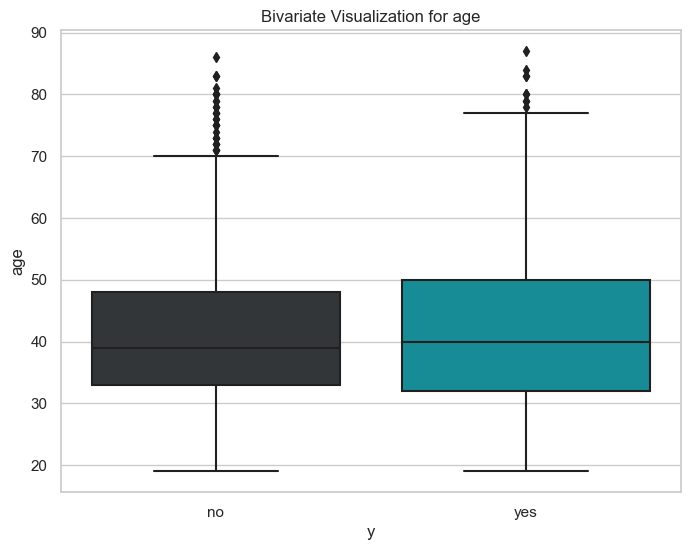

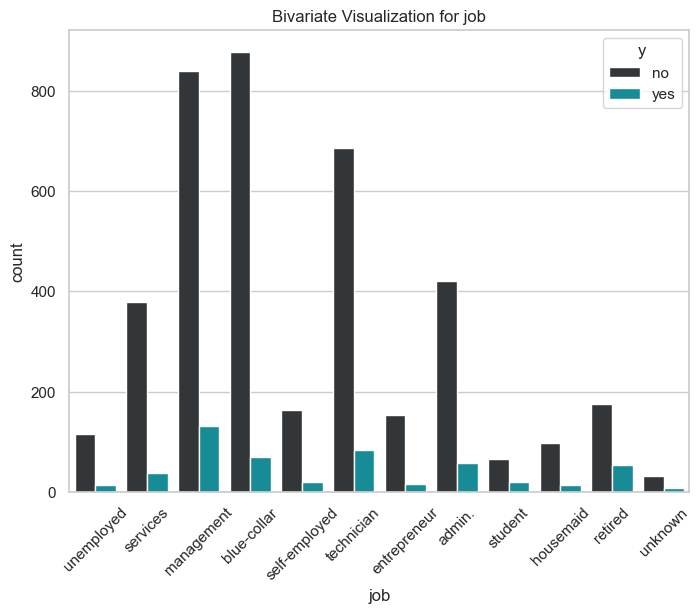

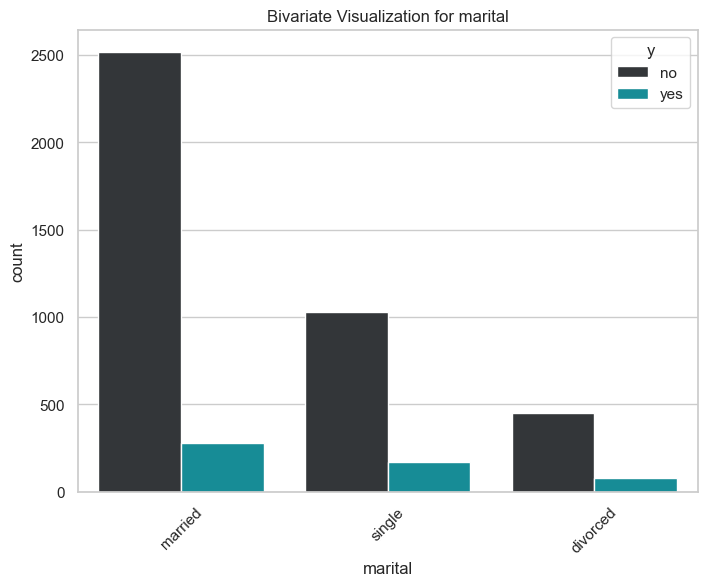

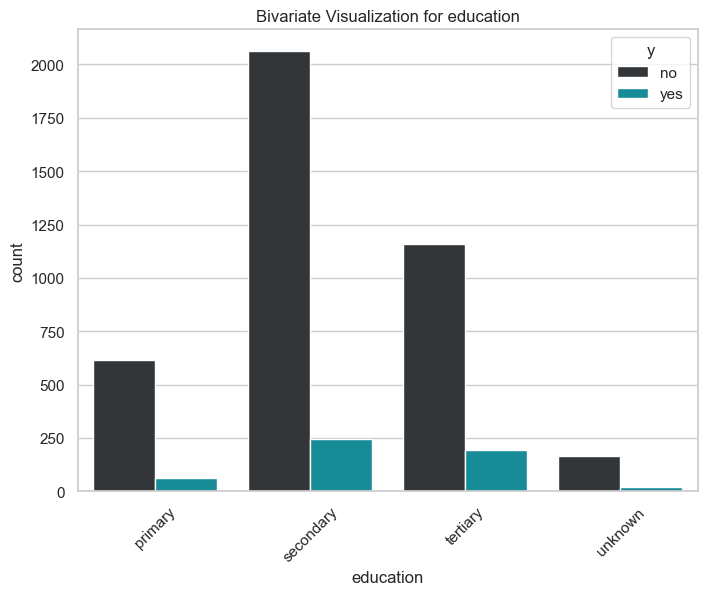

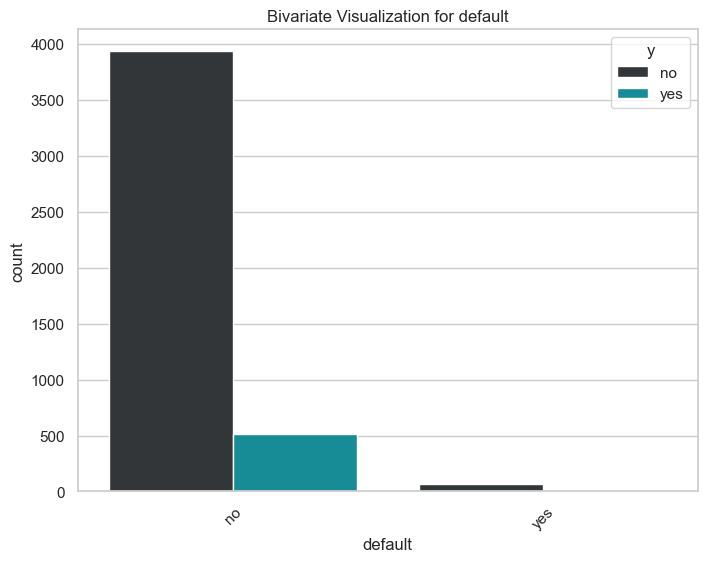

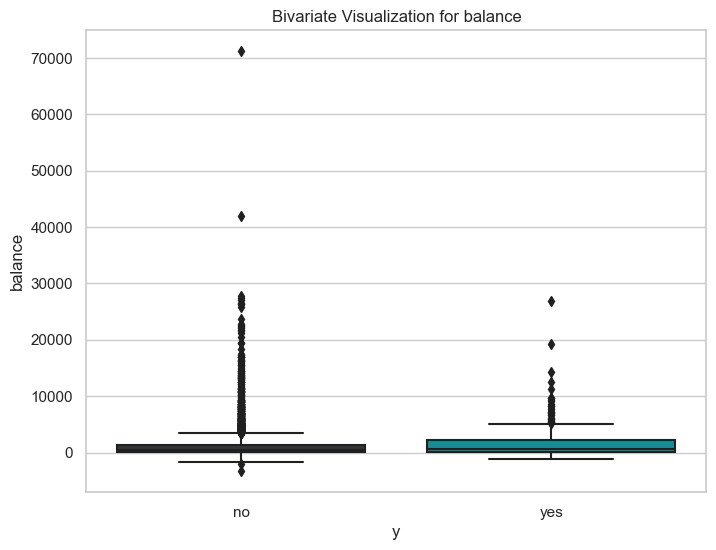

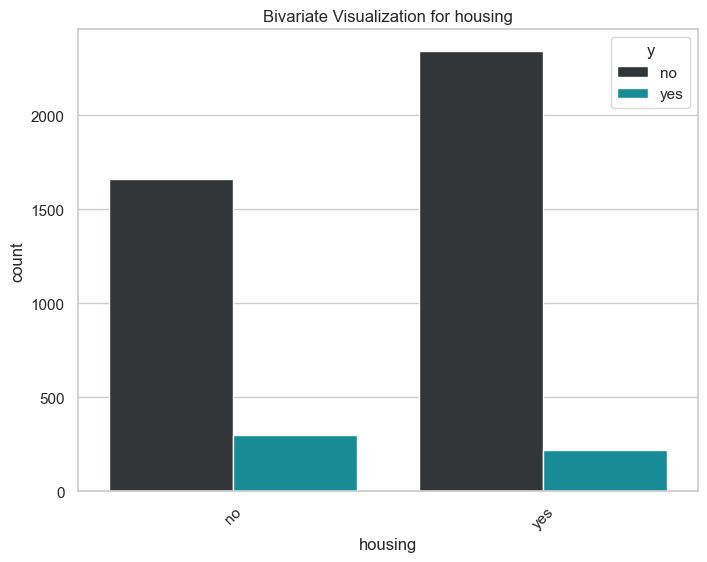

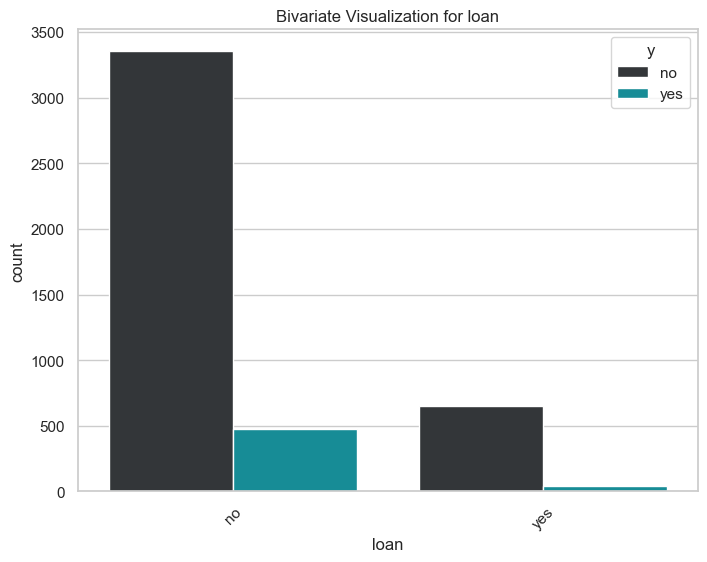

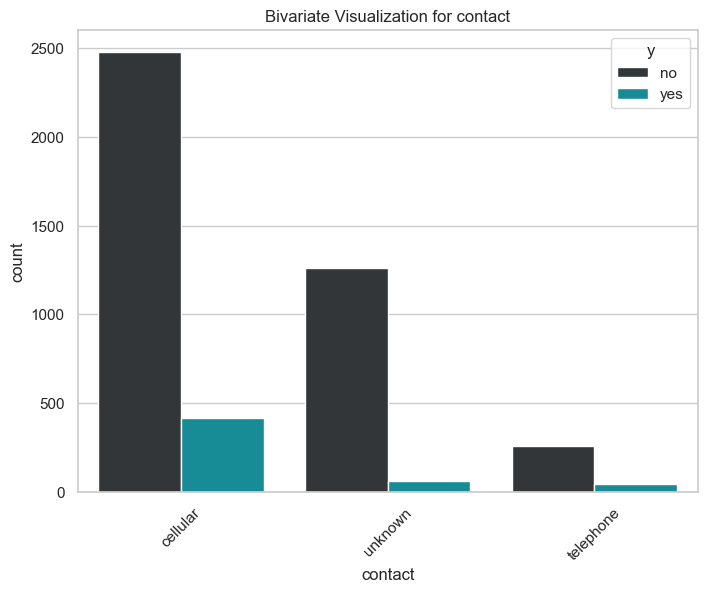

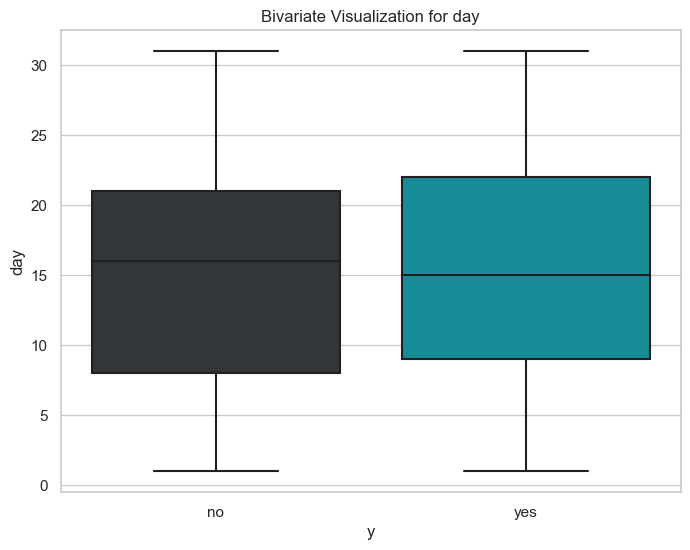

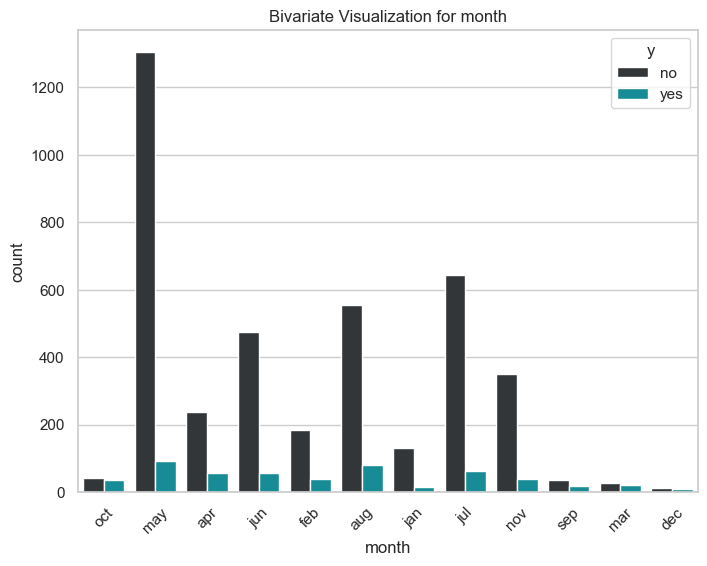

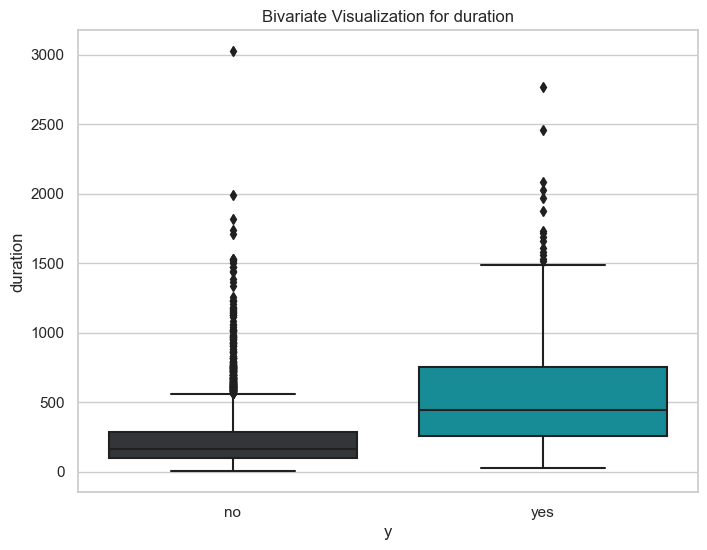

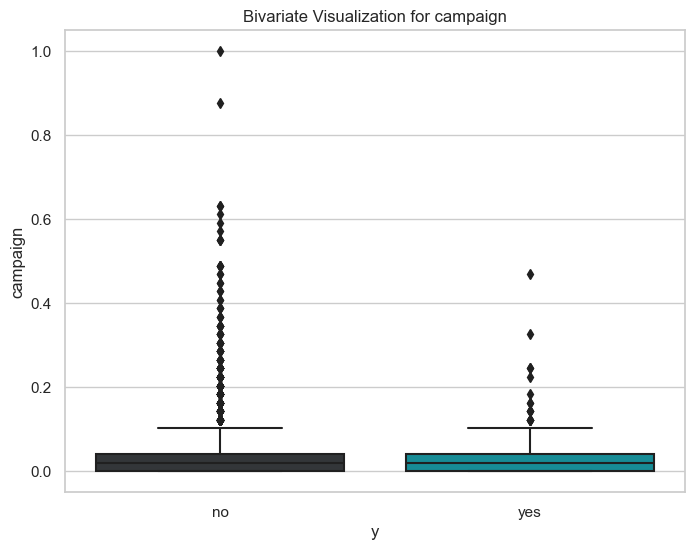

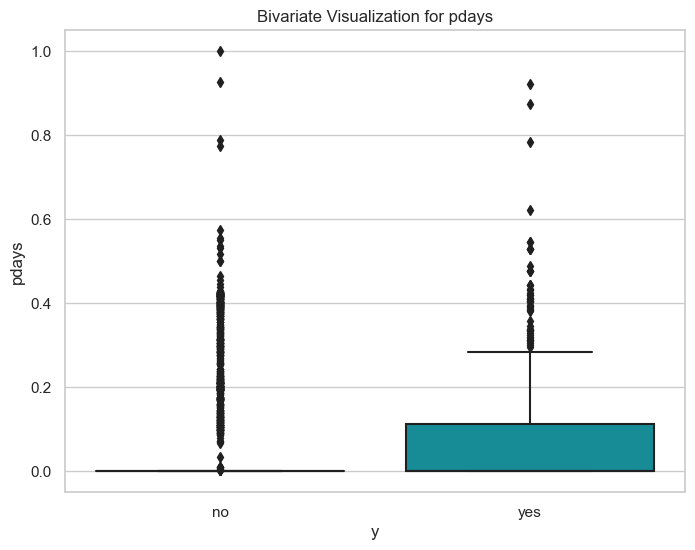

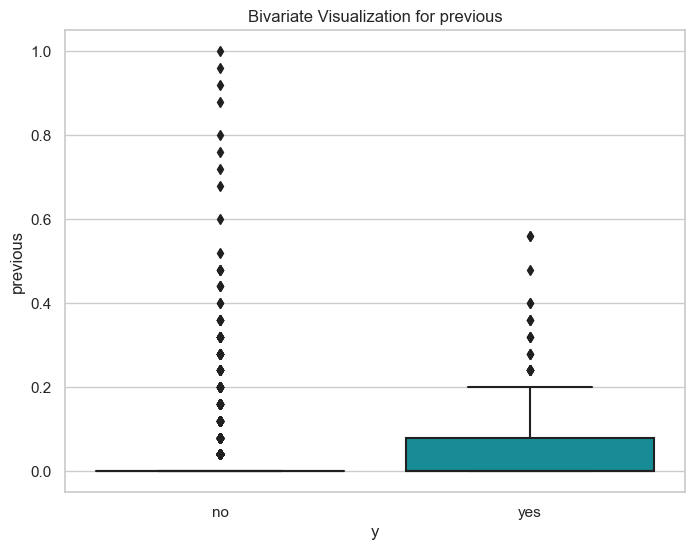

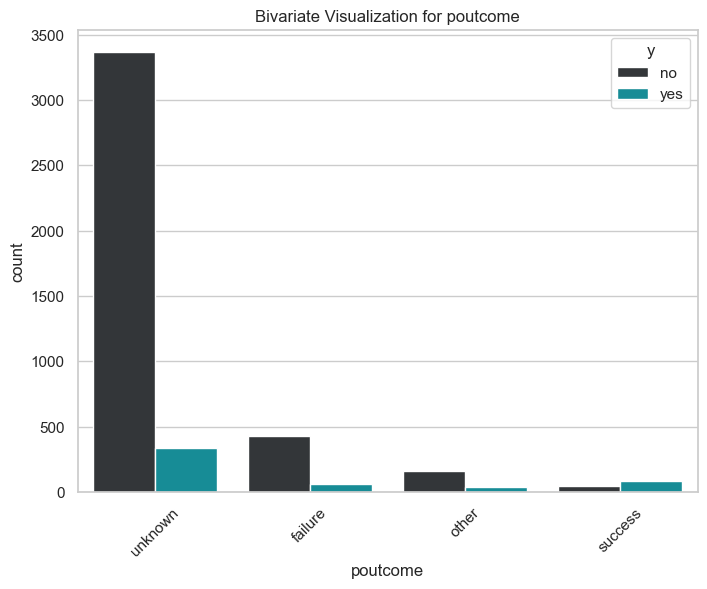

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'bank_data' is your DataFrame
# Define the color palette for the dependent variable 'y'
palette = {"yes": "#029EAB", "no": "#32363A"}

# Loop through independent variables and create visualizations
for column in independent_variables:
    plt.figure(figsize=(8, 6))
    if bank_data[column].dtype == "object":
        sns.countplot(data=bank_data, x=column, hue=dependent_variable, palette=palette)
        plt.xticks(rotation=45)
    else:
        # For boxplots, we need to convert the 'y' column to a categorical type that understands 'yes' and 'no' as categories
        sns.boxplot(data=bank_data, y=column, x=dependent_variable, palette=palette)
    plt.title(f'Bivariate Visualization for {column}')
    plt.show()


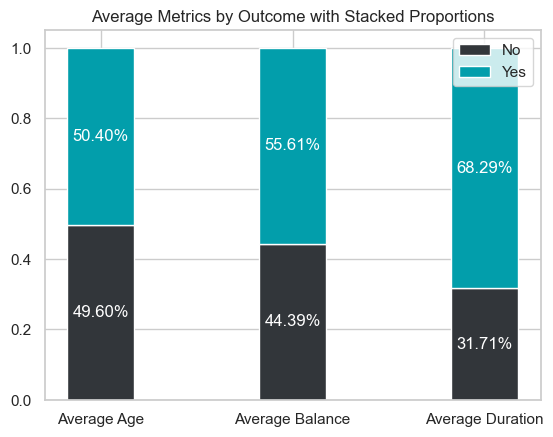

In [29]:
# Calculate the mean for 'age', 'balance', 'duration' for each 'yes' and 'no' category
means = bank_data.groupby('y')[['age', 'balance', 'duration']].mean()

# For stacked bar chart, calculate the total height of each bar
totals = means.sum(axis=0)

# Calculate the proportion for 'yes' and 'no' for each category
proportions = means / totals

# Start plotting
fig, ax = plt.subplots()

# Define the palette
palette = {"yes": "#029EAB", "no": "#32363A"}

# The x locations for the groups
ind = range(len(means.columns))

# The width of the bars: can also be len(x) sequence
width = 0.35

# Stacked bar chart
p1 = ax.bar(ind, proportions.loc['no', :], width, label='No', color=palette['no'])
p2 = ax.bar(ind, proportions.loc['yes', :], width, bottom=proportions.loc['no', :], label='Yes', color=palette['yes'])

ax.set_title('Average Metrics by Outcome with Stacked Proportions')
ax.set_xticks(ind)
ax.set_xticklabels(('Average Age', 'Average Balance', 'Average Duration'))
ax.legend()

# Label with percentages
for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    ax.annotate(f'{h1:.2%}', xy=(r1.get_x() + r1.get_width() / 2, h1 / 2), ha='center', va='center', color='white')
    ax.annotate(f'{h2:.2%}', xy=(r2.get_x() + r2.get_width() / 2, h1 + h2 / 2), ha='center', va='center', color='white')

plt.show()

- Clients who subscribed to a term deposit (yes) tend to be older than those who did not subscribe (no).
- Some job categories may have a higher proportion of subscribers than others.
- Married clients are the largest group among non-subscribers, but they also represent a significant portion of subscribers.
- Clients with secondary education form the largest group among non-subscribers, but they also represent a significant proportion of the subscribers.
Clients with tertiary education seem more likely to subscribe than those with primary education or unknown education levels

Overall, these visualizations suggest that demographic factors like age, job type, marital status, and education level, as well as the clients’ financial background (such as having a credit default), can influence the likelihood of subscribing to a term deposit. This information can be used to refine the targeting of marketing campaigns, focusing on the client segments more likely to subscribe..

### Data Cleaning

##### 1) They are no missing and duplicate values present

In [17]:
import numpy as np
import pandas as pd

# Function to cap outliers
def cap_outliers(data, column, upper_percentile=95):
    upper_limit = data[column].quantile(upper_percentile / 100.0)
    data[column] = np.where(data[column] > upper_limit, upper_limit, data[column])
    return data

# Apply the functions to cap outliers
outlier_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for col in outlier_columns:
    bank_data = cap_outliers(bank_data, col, 95)


- Age: Caps outliers at the 99th percentile.- 
Balance: Applies a logarithmic transformation to reduce the impact of extreme values.- 
Duration: Caps outliers at the 95th percentile- .
Campaign: Caps outliers at the 95th percentil- e.
Pdays: Imputes outliers using the median val- ue.
Previous: Caps outliers at the 95th percentile.

In [47]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

                                              0.0/235.6 kB ? eta -:--:--
     -------------------------------        194.6/235.6 kB 3.9 MB/s eta 0:00:01
     -------------------------------------- 235.6/235.6 kB 2.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Imbalance data

We used MinMaxScaler for scaling numerical columns and OneHotEncoder for encoding categorical columns. Additionally, we'll use SMOTE to handle class imbalance. 

#### Feature engineering 

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering: Customer Engagement Score, Age Binning, Normalized Duration
scaler_engagement = MinMaxScaler()
scaler_duration = MinMaxScaler()

bank_data[['campaign', 'pdays', 'previous']] = scaler_engagement.fit_transform(bank_data[['campaign', 'pdays', 'previous']])
bank_data['engagement_score'] = bank_data['campaign'] + bank_data['pdays'] + bank_data['previous']

# Binning Age
age_bins = [0, 30, 50, 100]
age_labels = ['Young', 'Middle', 'Senior']
bank_data['age_binned'] = pd.cut(bank_data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Normalizing Duration
bank_data['duration_norm'] = scaler_duration.fit_transform(bank_data[['duration']])

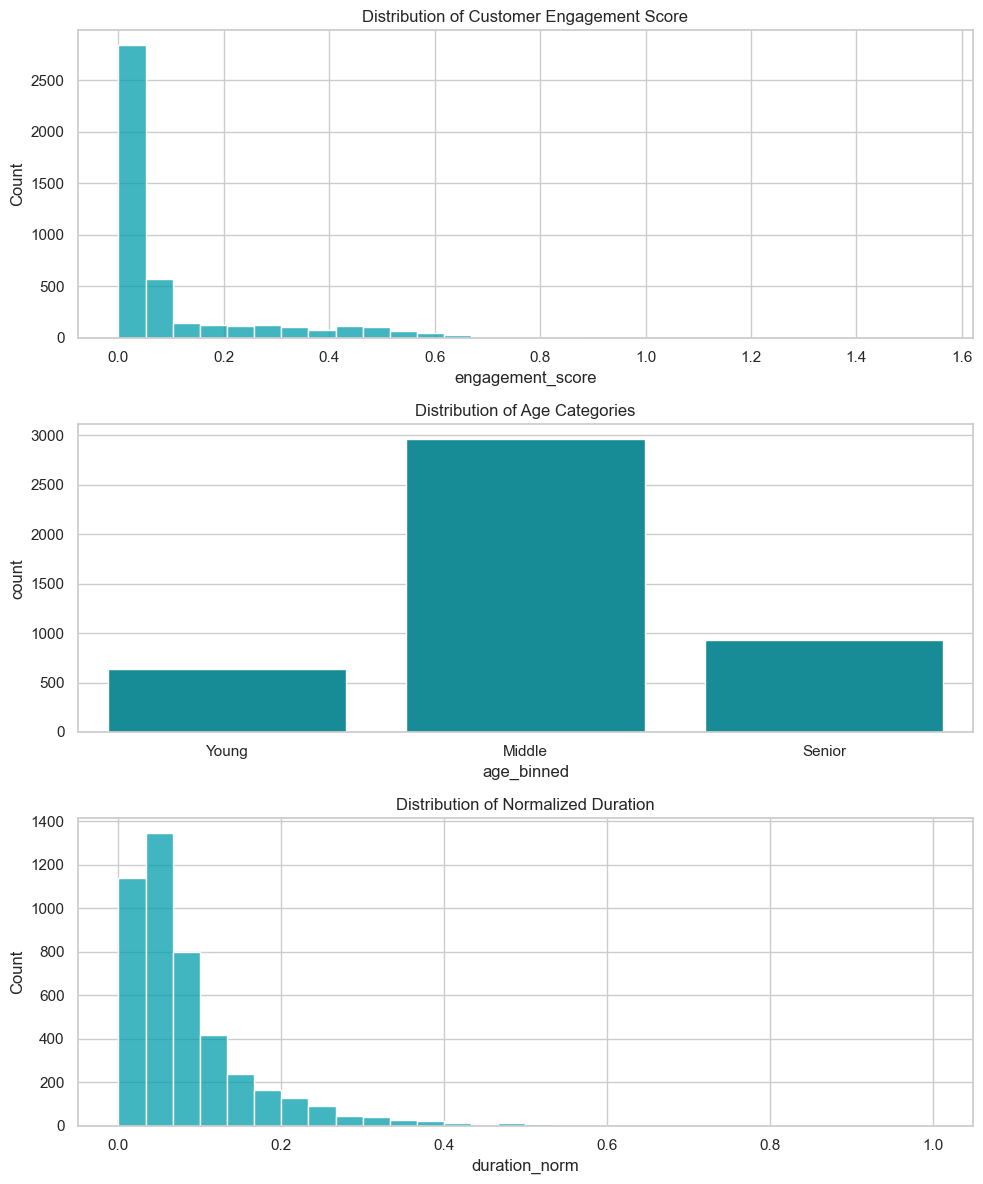

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming 'bank_data' is your DataFrame after feature engineering

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Defining the color for the plots
plot_color = '#029EAB'

# Creating subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Histogram for 'Customer Engagement Score'
sns.histplot(bank_data['engagement_score'], bins=30, kde=False, color=plot_color, ax=axes[0])
axes[0].set_title('Distribution of Customer Engagement Score')

# Bar Chart for 'Age Binned' Categories
sns.countplot(x='age_binned', data=bank_data, color=plot_color, ax=axes[1])
axes[1].set_title('Distribution of Age Categories')

# Histogram for 'Normalized Duration'
sns.histplot(bank_data['duration_norm'], bins=30, kde=False, color=plot_color, ax=axes[2])
axes[2].set_title('Distribution of Normalized Duration')

plt.tight_layout()
plt.show()


#### Feature Importance 

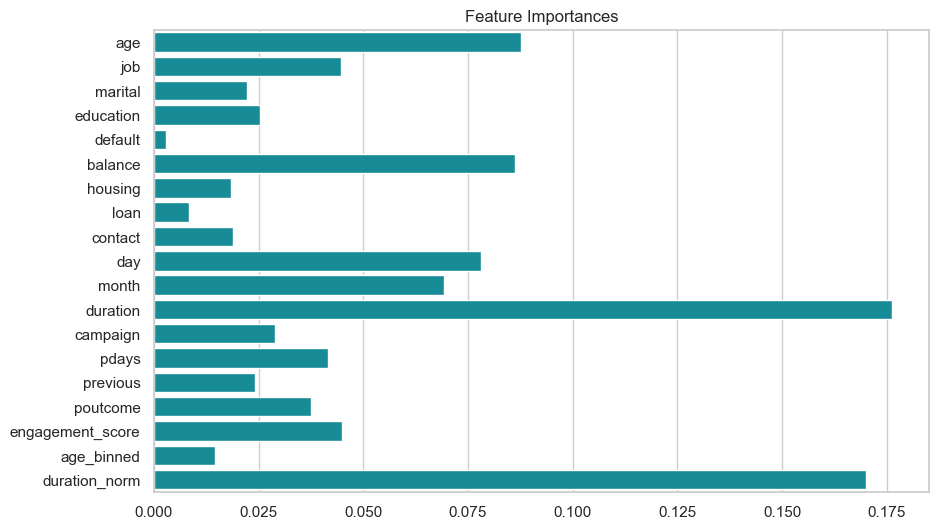

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical variables
bank_data_encoded = bank_data.apply(LabelEncoder().fit_transform)

# Separate features and target
X = bank_data_encoded.drop('y', axis=1)
y = bank_data_encoded['y']

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a pandas series for plotting
features = pd.Series(feature_importances, index=X.columns)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=features.index, color='#029EAB')  # Set the color for all bars
plt.title("Feature Importances")
plt.show()



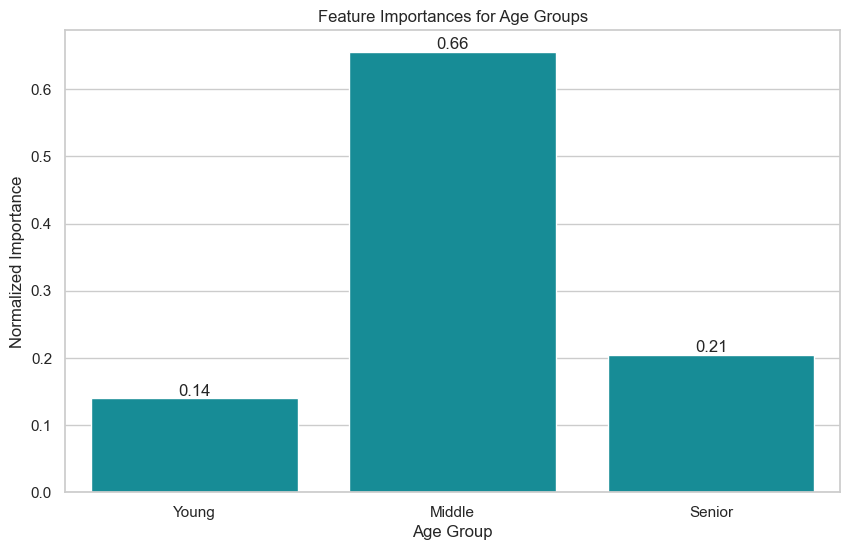

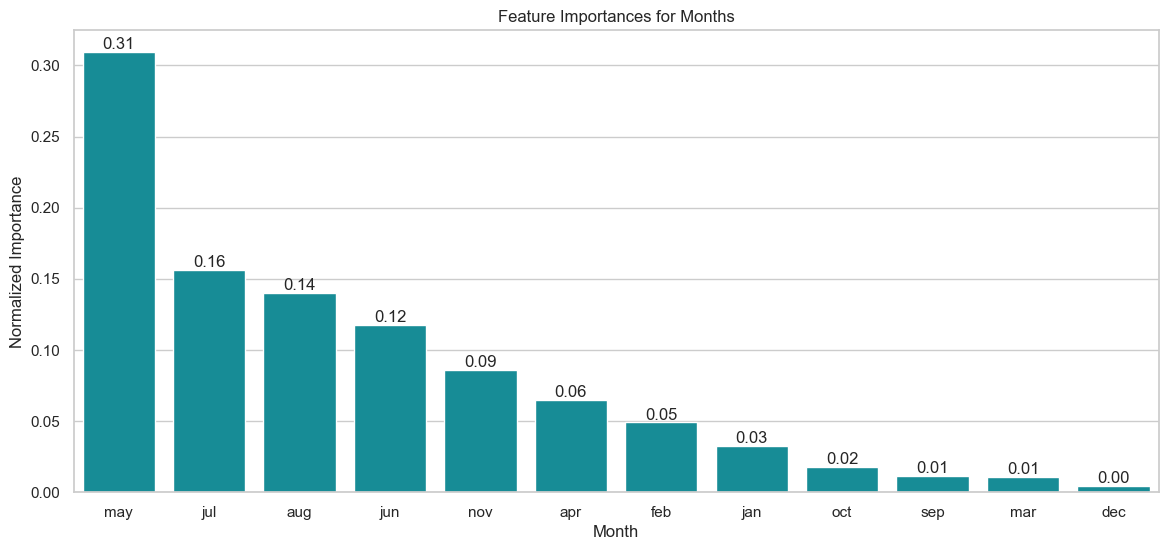

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'bank_data' is your DataFrame with the 'age' and 'month' columns already present

# Binning Age
age_bins = [0, 30, 50, 100]
age_labels = ['Young', 'Middle', 'Senior']
bank_data['age_binned'] = pd.cut(bank_data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Count occurrences of each age bin and each month
age_bin_counts = bank_data['age_binned'].value_counts().reindex(age_labels)  # Ensure consistent order
month_counts = bank_data['month'].value_counts()

# Normalize the counts for feature importance
age_bin_importance = age_bin_counts / age_bin_counts.sum()
month_importance = month_counts / month_counts.sum()

# Create a combined dataframe for plotting with age bins and months
age_bin_importance_df = age_bin_importance.reset_index()
age_bin_importance_df.columns = ['Age Group', 'Importance']

month_importance_df = month_importance.reset_index()
month_importance_df.columns = ['Month', 'Importance']

# Define the color for the plots
plot_color = '#029EAB'

# Plotting the age bin importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Importance', data=age_bin_importance_df, color=plot_color)
plt.title('Feature Importances for Age Groups')
plt.ylabel('Normalized Importance')
plt.xlabel('Age Group')

# Annotate the bars for age groups
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.2f}'.format(p.get_height()), 
                   ha='center', va='bottom')

# Show the plot for age groups
plt.show()

# Plotting the month importance
plt.figure(figsize=(14, 6))
sns.barplot(x='Month', y='Importance', data=month_importance_df, color=plot_color)
plt.title('Feature Importances for Months')
plt.ylabel('Normalized Importance')
plt.xlabel('Month')

# Annotate the bars for months
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.2f}'.format(p.get_height()), 
                   ha='center', va='bottom')

# Show the plot for months
plt.show()


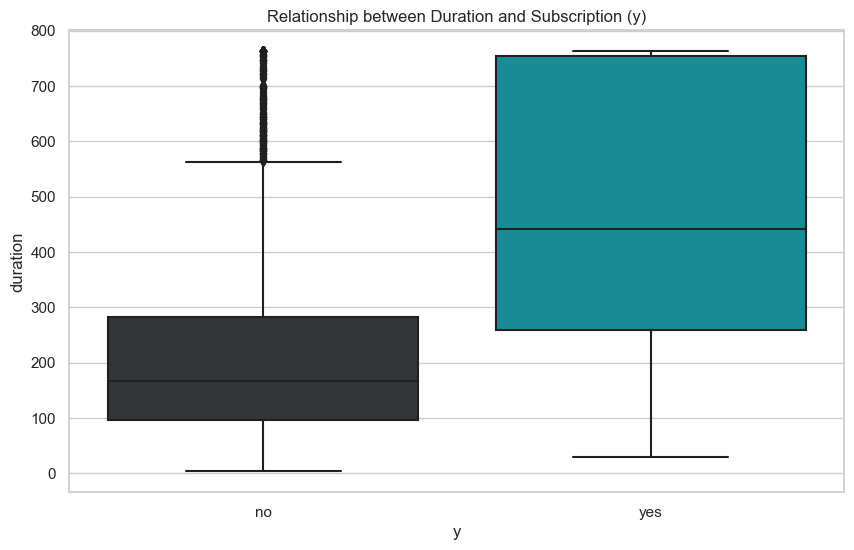

In [18]:
palette = {"yes": "#029EAB", "no": "#32363A"}

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=bank_data, palette=palette)
plt.title("Relationship between Duration and Subscription (y)")

# Show the plot
plt.show()

#### Model Buliding

#### Logistic Regression 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Preprocessing setup
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Prepare data
X = bank_data.drop('y', axis=1)
y = bank_data['y']
X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))


[[785  22]
 [ 74  24]]
              precision    recall  f1-score   support

          no       0.91      0.97      0.94       807
         yes       0.52      0.24      0.33        98

    accuracy                           0.89       905
   macro avg       0.72      0.61      0.64       905
weighted avg       0.87      0.89      0.88       905



Accuracy: 0.8939226519337017
Precision for "yes": [0.91385332 0.52173913]
Recall for "yes": [0.97273854 0.24489796]
F1-Score for "yes": [0.94237695 0.33333333]
Confusion Matrix:
[[785  22]
 [ 74  24]]
AUC: 0.8978833168955315


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


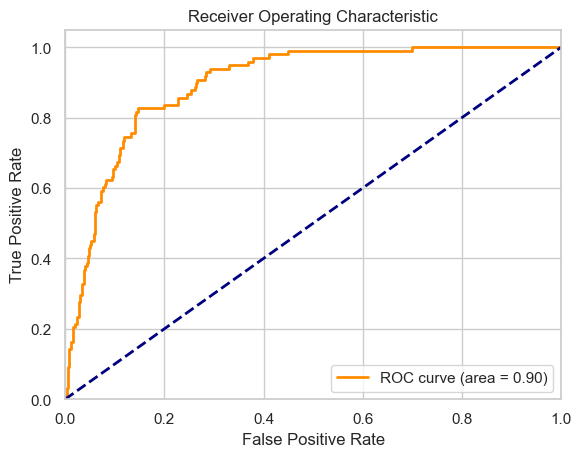

In [21]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision, Recall, F1-score for "yes"
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, pos_label='yes')
print(f'Precision for "yes": {precision}')
print(f'Recall for "yes": {recall}')
print(f'F1-Score for "yes": {fscore}')

# Confusion Matrix
print(f'Confusion Matrix:\n{cm}')

# AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='yes')

# Plot ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [23]:
import statsmodels.api as sm

# Adding an intercept term for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Display the summary which includes McFadden's R-squared
print(result.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [25]:
# Get feature names for one-hot encoded categorical columns
# Adjust based on your scikit-learn version
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Get all feature names
all_feature_names = numerical_cols + list(cat_feature_names)

# Now, you can fit the statsmodels Logit model using these feature names
X_train_sm = sm.add_constant(X_train)  # Adds a constant column for the intercept
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Update the DataFrame with the correct feature names
X_train_sm.columns = ['const'] + all_feature_names
result = logit_model.fit()

# Print the summary with correct feature names
print(result.summary2())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### p-values, rsquare

#### Radom Forest 

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Load your data
# bank_data = pd.read_csv('your_data.csv')  # Assuming you load data from a CSV file

# Separating the numerical and categorical columns
numerical_columns = bank_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = bank_data.select_dtypes(include=['object', 'category']).columns.difference(['y'])

# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    bank_data[col] = le.fit_transform(bank_data[col])
    label_encoders[col] = le

# Encode target variable
y = LabelEncoder().fit_transform(bank_data['y'])

# Split data
X = bank_data.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical data
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.901657458563536


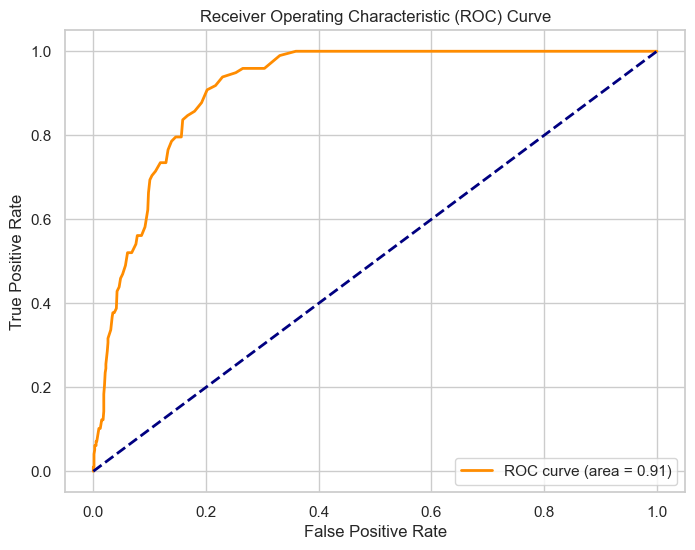

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Check the Accuracy again after applying SMOTE 

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming bank_data is already loaded and preprocessed

# Encode categorical variables
label_encoders = {}
for col in bank_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    bank_data[col] = le.fit_transform(bank_data[col])
    label_encoders[col] = le

# Encode target variable
y = LabelEncoder().fit_transform(bank_data['y'])
X = bank_data.drop('y', axis=1)  # Features


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check for NaN values after SMOTE
if X_train_smote.isnull().any().any() or pd.Series(y_train_smote).isnull().any():
    raise ValueError("NaN values were introduced by SMOTE.")

# Scale numerical data after SMOTE
scaler = StandardScaler()
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train_scaled = scaler.fit_transform(X_train_smote[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

# Reassemble the full training and test sets
X_train_smote = pd.DataFrame(X_train_scaled, columns=numerical_columns).join(X_train_smote.drop(columns=numerical_columns).reset_index(drop=True))
X_test = pd.DataFrame(X_test_scaled, columns=numerical_columns).join(X_test.drop(columns=numerical_columns).reset_index(drop=True))

# Train a random forest classifier on the SMOTE-augmented training data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_smote, y_train_smote)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after SMOTE: {accuracy}")

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python311\Lib\subprocess.py", line 1538, in _execute_ch

Accuracy after SMOTE: 0.8674033149171271
